<div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">Prediction using supervised ML </div></div>
<div style="text-align: center; color:#006666;font-size:30px; font-weight:bold; line-height:40px;"><strong>Ayuti Shivdavkar</strong></div>
<div style="text-align: center; color:#006666;font-size:30px; font-weight:bold; line-height:40px;"><strong>TASK 1</strong></div>
<div style="text-align: center; color:#006666;font-size:30px; font-weight:bold; line-height:40px;"><strong>The Sparks Foundation-Data Science & Business Analytics</strong></div>












In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:

data=pd.read_csv(r'D:\2021\student_scores.csv') 
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [115]:
data.shape

(25, 2)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [117]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [118]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## distribution of scores 

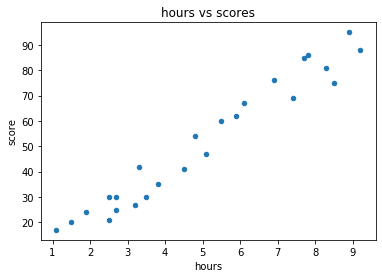

In [119]:
data.plot(x='Hours',y='Scores',kind='scatter')
plt.title("hours vs scores")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### **Preparing the data**


In [120]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [121]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [122]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


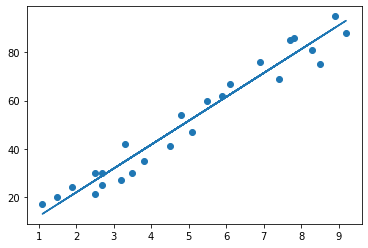

In [123]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [124]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [125]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [126]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**


In [127]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
